In [1]:
import os
import pandas as pd

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1 = '/content/drive/My Drive/DAT 490 Capstone/Data/water temp.csv'
water_temp = pd.read_csv(path1)

In [4]:
path2 = '/content/drive/My Drive/DAT 490 Capstone/Data/salinity.csv'
salinity = pd.read_csv(path2)

In [5]:
path3 = '/content/drive/My Drive/DAT 490 Capstone/Data/oxygen.csv'
oxygen = pd.read_csv(path3)

In [6]:
watertemp_min = water_temp.drop(['network', 'platform', 'vertical_datum', 'qcFlag '], axis=1)
salinity_min = salinity.drop(['network', 'platform', 'vertical_datum', 'qcFlag '], axis=1)
oxygen_min = oxygen.drop(['network', 'platform', 'vertical_datum', 'qcFlag '], axis=1)

In [7]:
combined_df = pd.merge(watertemp_min, salinity_min, on=['latitude', 'longitude', 'date'], how='outer')
combined_df = pd.merge(combined_df, oxygen_min, on=['latitude', 'longitude', 'date'], how='outer')
print(combined_df)

          latitude  longitude                  date  sea_water_temperature  \
0           17.002    -81.501  2010-01-09T23:00:00Z                    9.6   
1           17.002    -81.501  2010-01-10T00:00:00Z                    9.7   
2           17.002    -81.501  2010-01-10T01:00:00Z                    9.7   
3           17.002    -81.501  2010-01-10T02:00:00Z                    9.9   
4           17.002    -81.501  2010-01-10T03:00:00Z                   10.1   
...            ...        ...                   ...                    ...   
22666367       NaN        NaN                   NaN                    NaN   
22666368       NaN        NaN                   NaN                    NaN   
22666369       NaN        NaN                   NaN                    NaN   
22666370       NaN        NaN                   NaN                    NaN   
22666371       NaN        NaN                   NaN                    NaN   

          sea_water_practical_salinity  \
0                    

In [8]:
count_nan = combined_df.isna().sum()
print(count_nan)

latitude                                      2824875
longitude                                     2824875
date                                          2824875
sea_water_temperature                         3973102
sea_water_practical_salinity                 15380334
mass_concentration_of_oxygen_in_sea_water    19864218
dtype: int64


In [9]:
print(water_temp.shape)
print(oxygen.shape)
print(salinity.shape)

(18487964, 8)
(2779095, 8)
(7033552, 8)


In [10]:
noNaN = combined_df.dropna(subset=['latitude', 'longitude', 'date', 'sea_water_temperature', 'sea_water_practical_salinity', 'mass_concentration_of_oxygen_in_sea_water'])
print(noNaN.shape)

(2467071, 6)


In [11]:
print(noNaN)

          latitude  longitude                  date  sea_water_temperature  \
1756799    25.8922   -81.4770  2017-02-07T15:30:00Z                  22.70   
1756800    25.8922   -81.4770  2017-03-09T16:15:00Z                  23.50   
1756801    25.8922   -81.4770  2017-03-22T14:30:00Z                  22.00   
1756802    25.8922   -81.4770  2017-04-05T15:30:00Z                  27.20   
1756803    25.8922   -81.4770  2017-04-19T15:30:00Z                  23.40   
...            ...        ...                   ...                    ...   
19649562   30.6671   -87.9365  2020-02-08T12:00:00Z                  59.12   
19649563   30.6671   -87.9365  2020-02-08T15:00:00Z                  61.57   
19649564   30.6671   -87.9365  2020-02-08T18:00:00Z                  63.75   
19649565   30.6671   -87.9365  2020-02-08T21:00:00Z                  64.77   
19649566   30.6671   -87.9365  2020-02-09T00:00:00Z                  71.56   

          sea_water_practical_salinity  \
1756799              

In [12]:
# Convert the date column to pandas datetime, coercing errors to NaT for invalid formats
noNaN['date'] = pd.to_datetime(noNaN['date'], errors='coerce')

noNaN['date'] = noNaN['date'].dt.tz_localize(None)

# Check how many invalid dates (NaT) are present
invalid_dates = noNaN['date'].isna().sum()
print(f"Number of invalid date entries: {invalid_dates}")

# Optional: Inspect rows with invalid dates
if invalid_dates > 0:
    print(noNaN[noNaN['date'].isna()].head())

# Define a function to convert date to fraction of year
def date_to_fraction_of_year(date):
    if pd.isna(date):
        return None  # Handle NaT values
    year = date.year
    start_of_year = pd.Timestamp(year=year, month=1, day=1)
    end_of_year = pd.Timestamp(year=year + 1, month=1, day=1)

    # Calculate how far the date is into the year
    days_in_year = (end_of_year - start_of_year).days
    day_of_year = (date - start_of_year).days

    # Return the fraction of the year
    return year + (day_of_year / days_in_year)

# Apply the function to the entire column
noNaN['years'] = noNaN['date'].apply(date_to_fraction_of_year)

# Display the updated DataFrame
print(noNaN[['date', 'years']].head())


<ipython-input-12-bfc93ebede1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noNaN['date'] = pd.to_datetime(noNaN['date'], errors='coerce')
<ipython-input-12-bfc93ebede1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noNaN['date'] = noNaN['date'].dt.tz_localize(None)


Number of invalid date entries: 36
          latitude  longitude date  sea_water_temperature  \
18903156   30.4367   -88.0117  NaT                  10.66   
18903157   30.4367   -88.0117  NaT                  10.29   
18903158   30.4367   -88.0117  NaT                  10.10   
18903159   30.4367   -88.0117  NaT                  10.25   
18903160   30.4367   -88.0117  NaT                  10.50   

          sea_water_practical_salinity  \
18903156                          5.24   
18903157                          2.79   
18903158                          0.54   
18903159                          0.34   
18903160                          0.29   

          mass_concentration_of_oxygen_in_sea_water  
18903156                                       8.98  
18903157                                       9.30  
18903158                                       9.63  
18903159                                       9.73  
18903160                                       9.80  
                     

<ipython-input-12-bfc93ebede1c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noNaN['years'] = noNaN['date'].apply(date_to_fraction_of_year)


In [13]:
cleaned_df = noNaN.dropna(subset=['years'])
print(cleaned_df.shape)
print(cleaned_df.head())

(2467035, 7)
         latitude  longitude                date  sea_water_temperature  \
1756799   25.8922    -81.477 2017-02-07 15:30:00                   22.7   
1756800   25.8922    -81.477 2017-03-09 16:15:00                   23.5   
1756801   25.8922    -81.477 2017-03-22 14:30:00                   22.0   
1756802   25.8922    -81.477 2017-04-05 15:30:00                   27.2   
1756803   25.8922    -81.477 2017-04-19 15:30:00                   23.4   

         sea_water_practical_salinity  \
1756799                          34.2   
1756800                          36.8   
1756801                          36.2   
1756802                          36.8   
1756803                          38.1   

         mass_concentration_of_oxygen_in_sea_water        years  
1756799                                        5.7  2017.101370  
1756800                                        6.4  2017.183562  
1756801                                        5.7  2017.219178  
1756802                  

Median: 22.02
Lower Quartile: 13.65
Upper Quartile: 28.3
Lower Whisker: 0.0
Upper Whisker: 50.22
Outliers: [-9999.   -9999.   -9999.   ...    63.75    64.77    71.56]


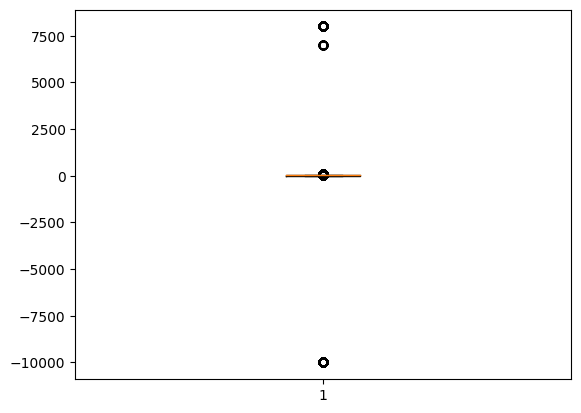

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bp = ax.boxplot(cleaned_df['sea_water_temperature'])

# Get the boxplot values
median = bp['medians'][0].get_ydata()[0]
lower_quartile = bp['boxes'][0].get_ydata()[0]
upper_quartile = bp['boxes'][0].get_ydata()[2]
lower_whisker = bp['whiskers'][0].get_ydata()[1]
upper_whisker = bp['whiskers'][1].get_ydata()[1]
outliers = bp['fliers'][0].get_ydata()

print("Median:", median)
print("Lower Quartile:", lower_quartile)
print("Upper Quartile:", upper_quartile)


print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)
print("Outliers:", outliers)

Median: 15.54
Lower Quartile: 1.58
Upper Quartile: 25.81
Lower Whisker: 0.0
Upper Whisker: 62.12
Outliers: [-9999.   -9999.   -9999.   ...    62.91    62.91    62.42]


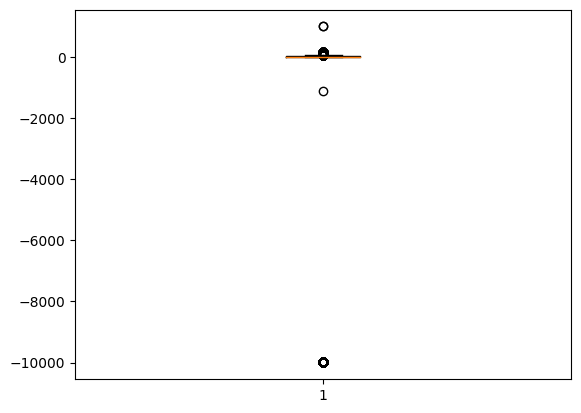

In [15]:
fig, ax = plt.subplots()
bp = ax.boxplot(cleaned_df['sea_water_practical_salinity'])

# Get the boxplot values
median = bp['medians'][0].get_ydata()[0]
lower_quartile = bp['boxes'][0].get_ydata()[0]
upper_quartile = bp['boxes'][0].get_ydata()[2]
lower_whisker = bp['whiskers'][0].get_ydata()[1]
upper_whisker = bp['whiskers'][1].get_ydata()[1]
outliers = bp['fliers'][0].get_ydata()

print("Median:", median)
print("Lower Quartile:", lower_quartile)
print("Upper Quartile:", upper_quartile)
print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)
print("Outliers:", outliers)

Median: 6.43
Lower Quartile: 4.12
Upper Quartile: 7.92
Lower Whisker: -1.1
Upper Whisker: 13.62
Outliers: [-9999.   -9999.   -9999.   ...    13.93    13.71    72.  ]


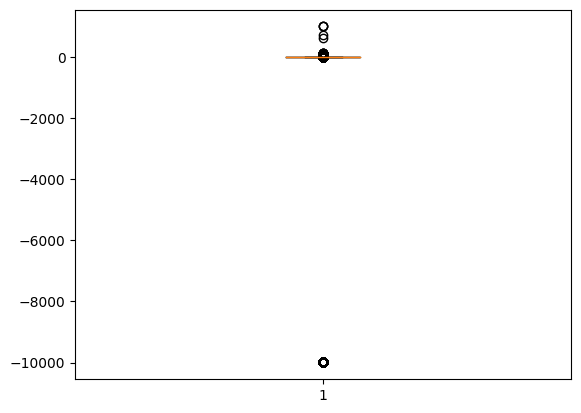

In [16]:
fig, ax = plt.subplots()
bp = ax.boxplot(cleaned_df['mass_concentration_of_oxygen_in_sea_water'])

# Get the boxplot values
median = bp['medians'][0].get_ydata()[0]
lower_quartile = bp['boxes'][0].get_ydata()[0]
upper_quartile = bp['boxes'][0].get_ydata()[2]
lower_whisker = bp['whiskers'][0].get_ydata()[1]
upper_whisker = bp['whiskers'][1].get_ydata()[1]
outliers = bp['fliers'][0].get_ydata()

print("Median:", median)
print("Lower Quartile:", lower_quartile)
print("Upper Quartile:", upper_quartile)
print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)
print("Outliers:", outliers)

In [17]:
final_df = cleaned_df[cleaned_df['sea_water_temperature'] <= 51.22]
final_df = final_df[final_df['sea_water_temperature'] >= 0]
final_df = final_df[final_df['sea_water_practical_salinity'] <= 62.12]
final_df = final_df[final_df['sea_water_practical_salinity'] >= 0]
final_df = final_df[final_df['mass_concentration_of_oxygen_in_sea_water'] <= 13.62]
final_df = final_df[final_df['mass_concentration_of_oxygen_in_sea_water'] >= -1.1]
print(final_df.shape)
print(final_df.head())

(2006980, 7)
         latitude  longitude                date  sea_water_temperature  \
1756799   25.8922    -81.477 2017-02-07 15:30:00                   22.7   
1756800   25.8922    -81.477 2017-03-09 16:15:00                   23.5   
1756801   25.8922    -81.477 2017-03-22 14:30:00                   22.0   
1756802   25.8922    -81.477 2017-04-05 15:30:00                   27.2   
1756803   25.8922    -81.477 2017-04-19 15:30:00                   23.4   

         sea_water_practical_salinity  \
1756799                          34.2   
1756800                          36.8   
1756801                          36.2   
1756802                          36.8   
1756803                          38.1   

         mass_concentration_of_oxygen_in_sea_water        years  
1756799                                        5.7  2017.101370  
1756800                                        6.4  2017.183562  
1756801                                        5.7  2017.219178  
1756802                  

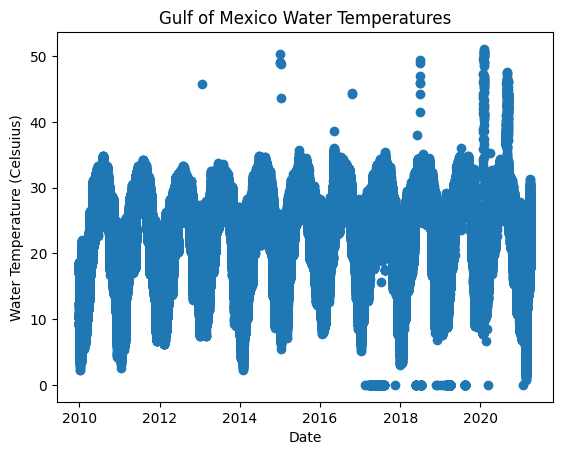

In [18]:
import numpy as np


# Define X and Y variable data
x = final_df['years']
y = final_df['sea_water_temperature']

plt.scatter(x, y)
plt.xlabel("Date")  # add X-axis label
plt.ylabel("Water Temperature (Celsuius)")  # add Y-axis label
plt.title("Gulf of Mexico Water Temperatures")  # add title
plt.show()

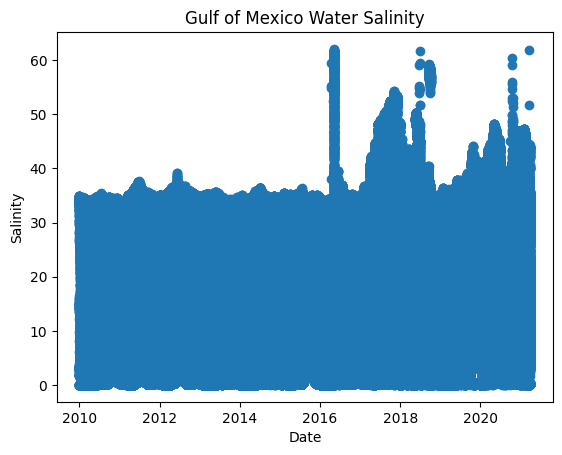

In [19]:
import matplotlib.pyplot as plt
import numpy as np


# Define X and Y variable data
x = final_df['years']
y = final_df['sea_water_practical_salinity']

plt.scatter(x, y)
plt.xlabel("Date")  # add X-axis label
plt.ylabel("Salinity")  # add Y-axis label
plt.title("Gulf of Mexico Water Salinity")  # add title
plt.show()

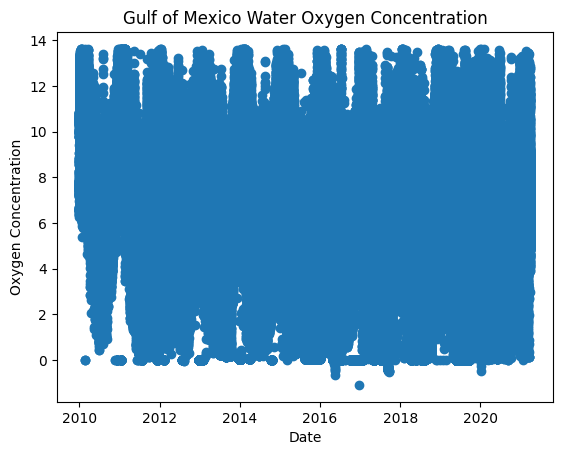

In [20]:
import matplotlib.pyplot as plt
import numpy as np


# Define X and Y variable data
x = final_df['years']
y = final_df['mass_concentration_of_oxygen_in_sea_water']

plt.scatter(x, y)
plt.xlabel("Date")  # add X-axis label
plt.ylabel("Oxygen Concentration")  # add Y-axis label
plt.title("Gulf of Mexico Water Oxygen Concentration")  # add title
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


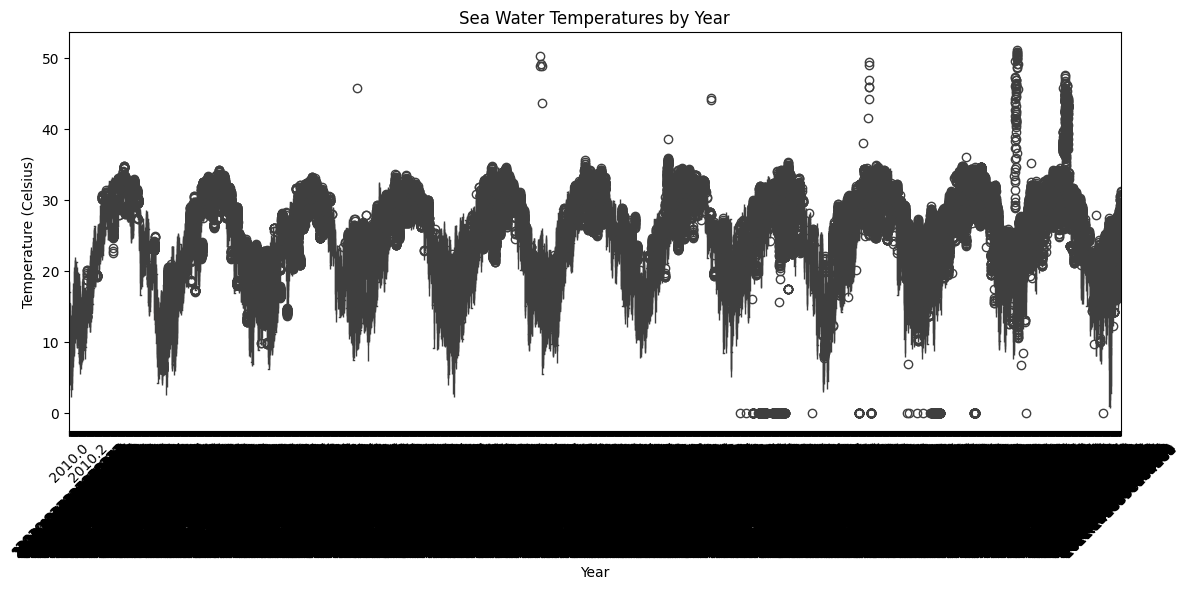

In [21]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='years', y='sea_water_temperature', data=final_df)

# Customize the plot
plt.title('Sea Water Temperatures by Year')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

SPECIES: Atlantic sharpnose shark, brown rock shrimp, Mueller's Sea Pansy, Paper Scallop, Emerald Parrotfish

quick visualization on depth, lat/long for each species

analysis: does a change in prey depth/lat/long have any correlation to changes in predator depth/lat/long? how long does it take to see a change, if any?

CLIMATE: temperature (and any other climate variables)

quick visualization on temperature trends over the past few decades

In [22]:
pip install matplotlib basemap basemap-data-hires

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


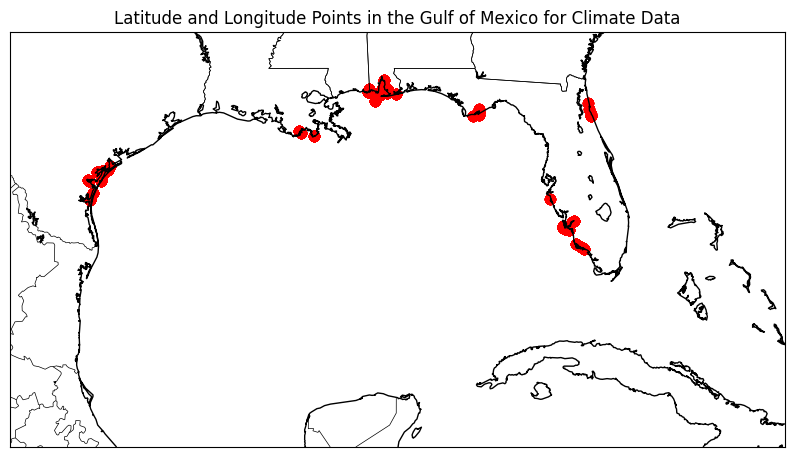

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance for the Gulf of Mexico
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=20, urcrnrlat=32, llcrnrlon=-100, urcrnrlon=-75, resolution='i')

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert latitude and longitude to map projection coordinates
x, y = m(final_df['longitude'], final_df['latitude'])

# Plot the points on the map
m.scatter(x, y, marker='o', color='red', s=50)  # Adjust 's' for size of points

# Add a title
plt.title('Latitude and Longitude Points in the Gulf of Mexico for Climate Data')
plt.show()

machine learning: predict future climate patterns

possiblity 1: try multiple different methods to see what has the best accuracy

possibility 2: taking into account that temperature have increaed more in recent years than past (and past averages will drag down future predicted temps), try models using different amounts of data (50 years, 20 years, 10 years, 5 years, 3 years)

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [25]:
# Assume 'final_df' is your cleaned dataset

# Scaling the data for LSTM (values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_df[['mass_concentration_of_oxygen_in_sea_water',
                                             'sea_water_practical_salinity',
                                             'sea_water_temperature']])

# Splitting the dataset (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Defining function to prepare data for LSTM (timesteps as input)
def prepare_lstm_data(data, n_timesteps=3):
    X, y = [], []
    for i in range(n_timesteps, len(data)):
        X.append(data[i-n_timesteps:i, :])
        y.append(data[i, :])
    return np.array(X), np.array(y)

# Prepare training and testing data (using 3 timesteps)
n_timesteps = 3
X_train, y_train = prepare_lstm_data(train, n_timesteps)
X_test, y_test = prepare_lstm_data(test, n_timesteps)


In [26]:


# Building the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_timesteps, 3)))  # 3 input features (oxygen, salinity, temperature)
model.add(Dense(3))  # 3 output features (predictions for oxygen, salinity, temperature)
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the LSTM model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 171s 3ms/step - loss: 0.0017
Epoch 2/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 204s 3ms/step - loss: 5.2521e-04
Epoch 3/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 205s 3ms/step - loss: 5.1791e-04
Epoch 4/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 233s 4ms/step - loss: 5.1331e-04
Epoch 5/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 260s 4ms/step - loss: 5.0918e-04
Epoch 6/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 205s 4ms/step - loss: 5.0691e-04
Epoch 7/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 264s 4ms/step - loss: 5.0597e-04
Epoch 8/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 182s 4ms/step - loss: 5.0510e-04
Epoch 9/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 194s 4ms/step - loss: 5.0699e-04
Epoch 10/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 211s 4ms/step - loss: 5.0355e-04
Epoch 11/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 196s 4ms/step - loss: 5.0487e-04
Epoch 12/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 207s 4ms/step - loss: 5.0078e-04
Epoch 13/20
50175/50175 ━━━━━━━━━━━━━━━━━━━━ 192s 4ms/step - loss: 4.9957e-04

In [27]:
# Make predictions on the test data
predictions_scaled = model.predict(X_test)

# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions_scaled)

# Reverse scaling for y_test as well for comparison
y_test_original = scaler.inverse_transform(y_test)

# Calculate RMSE for each variable
rmse_oxygen = np.sqrt(mean_squared_error(y_test_original[:, 0], predictions[:, 0]))
rmse_salinity = np.sqrt(mean_squared_error(y_test_original[:, 1], predictions[:, 1]))
rmse_temperature = np.sqrt(mean_squared_error(y_test_original[:, 2], predictions[:, 2]))

print(f'LSTM RMSE - Oxygen: {rmse_oxygen}, Salinity: {rmse_salinity}, Temperature: {rmse_temperature}')


12544/12544 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step
LSTM RMSE - Oxygen: 0.8712236808702853, Salinity: 2.767751128993875, Temperature: 0.4533319650154675


In [ ]:
# Plotting the predictions against the actual values
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_original[:, 0], label='True Oxygen')
plt.plot(predictions[:, 0], label='Predicted Oxygen')
plt.title('Oxygen Concentration')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(y_test_original[:, 1], label='True Salinity')
plt.plot(predictions[:, 1], label='Predicted Salinity')
plt.title('Salinity')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(y_test_original[:, 2], label='True Temperature')
plt.plot(predictions[:, 2], label='Predicted Temperature')
plt.title('Temperature')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


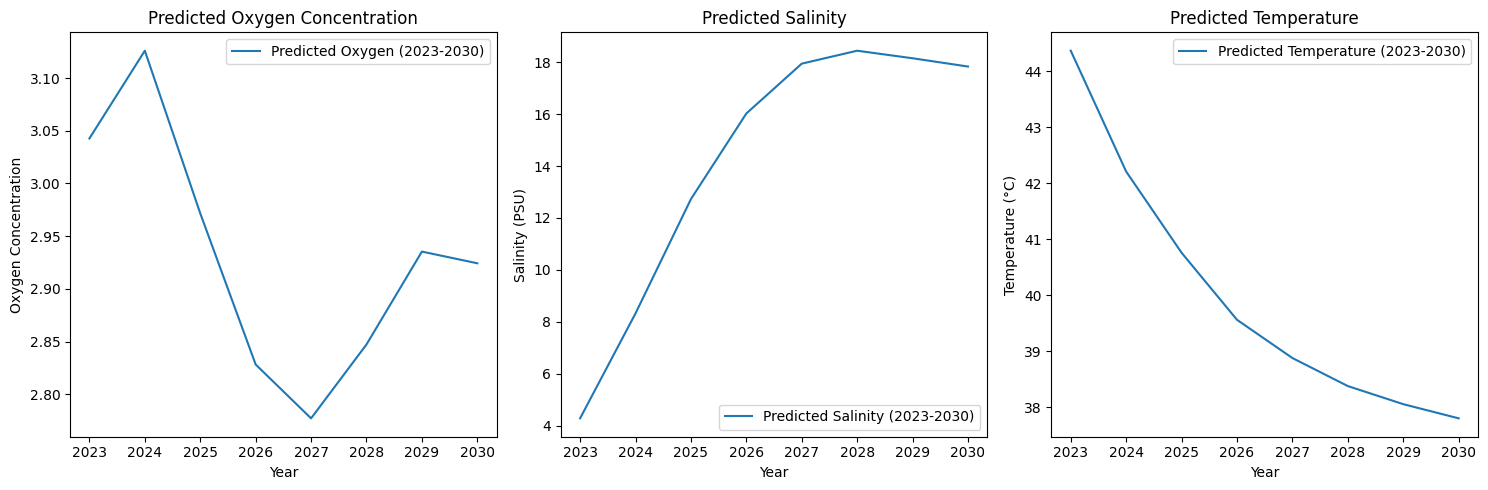

     Oxygen   Salinity  Temperature
0  3.042732   4.278521    44.371078
1  3.125976   8.321373    42.210915
2  2.971648  12.725404    40.759609
3  2.828221  16.025166    39.560802
4  2.777131  17.946150    38.877274
5  2.847220  18.444815    38.376175
6  2.935357  18.153870    38.052826
7  2.924273  17.835066    37.799225


In [29]:
# Predict future data from 2023 to 2030
n_future_years = 8  # Predict for 2023 to 2030
n_features = 3  # Oxygen, salinity, temperature

# Preparing to use the last data points from the test set to predict future values
future_predictions = []
input_sequence = test[-n_timesteps:]  # Start with the last available data from the test set

# Iteratively predict future years
for i in range(n_future_years):
    # Reshape the input sequence to fit LSTM input shape (1 sample, timesteps, features)
    input_sequence_reshaped = input_sequence.reshape((1, n_timesteps, n_features))

    # Predict the next step (future value)
    next_prediction_scaled = model.predict(input_sequence_reshaped)

    # Inverse scale the prediction to get the original values
    next_prediction = scaler.inverse_transform(next_prediction_scaled)

    # Append the prediction to the future predictions list
    future_predictions.append(next_prediction[0])

    # Update the input sequence by appending the new prediction and removing the oldest time step
    next_prediction_scaled = next_prediction_scaled.reshape((1, n_features))  # Flatten for appending
    input_sequence = np.append(input_sequence[1:], next_prediction_scaled, axis=0)

# Convert the future predictions to a DataFrame for easy visualization
future_predictions_df = pd.DataFrame(future_predictions, columns=['Oxygen', 'Salinity', 'Temperature'])
future_years = np.arange(2023, 2031)  # Future years

# Plot the predictions for the future
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(future_years, future_predictions_df['Oxygen'], label='Predicted Oxygen (2023-2030)')
plt.title('Predicted Oxygen Concentration')
plt.xlabel('Year')
plt.ylabel('Oxygen Concentration')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(future_years, future_predictions_df['Salinity'], label='Predicted Salinity (2023-2030)')
plt.title('Predicted Salinity')
plt.xlabel('Year')
plt.ylabel('Salinity (PSU)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(future_years, future_predictions_df['Temperature'], label='Predicted Temperature (2023-2030)')
plt.title('Predicted Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()

# Print future predictions
print(future_predictions_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

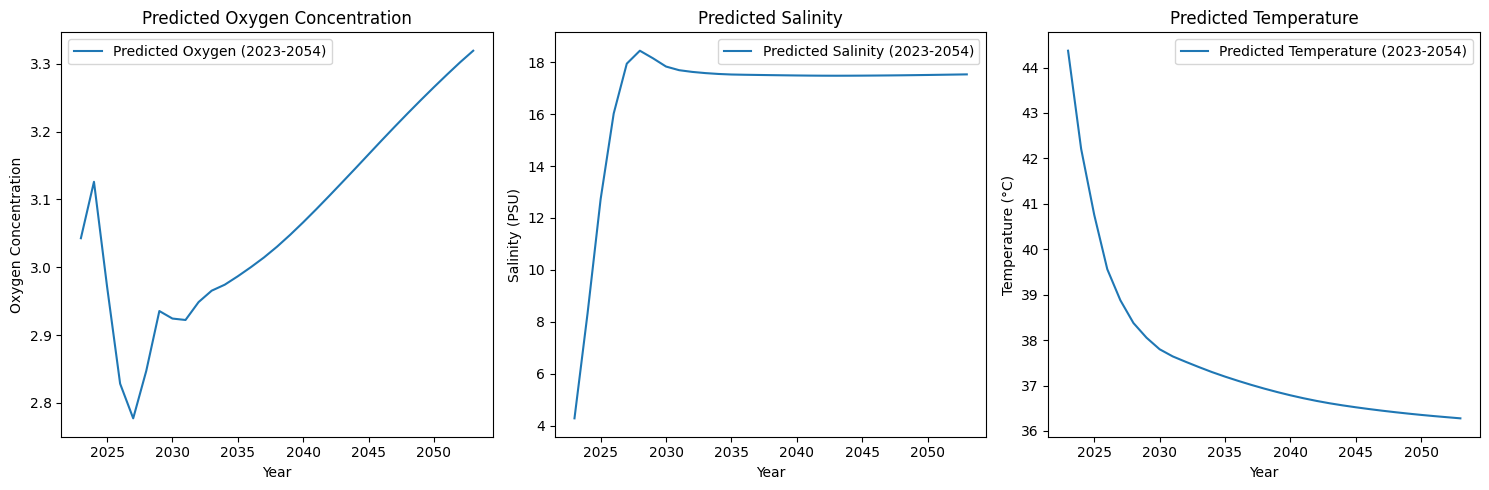

      Oxygen   Salinity  Temperature
0   3.042732   4.278521    44.371078
1   3.125976   8.321373    42.210915
2   2.971648  12.725404    40.759609
3   2.828221  16.025166    39.560802
4   2.777131  17.946150    38.877274
5   2.847220  18.444815    38.376175
6   2.935357  18.153870    38.052826
7   2.924273  17.835066    37.799225
8   2.922178  17.694567    37.642021
9   2.948568  17.628647    37.522228
10  2.965373  17.582775    37.407032
11  2.974206  17.549253    37.296959
12  2.986643  17.527992    37.196884
13  3.000060  17.518311    37.103710
14  3.014364  17.511026    37.015533
15  3.030288  17.503984    36.933041
16  3.047723  17.497160    36.856304
17  3.066226  17.490870    36.785431
18  3.085518  17.485691    36.720600
19  3.105373  17.482231    36.661972
20  3.125560  17.480940    36.609604
21  3.145881  17.482103    36.563488
22  3.166455  17.484695    36.521725
23  3.186990  17.488117    36.483074
24  3.207208  17.492325    36.447132
25  3.227069  17.497375    36.413689
2

In [30]:
# Predict future data from 2023 to 2054
n_future_years = 31  # Predict for 2023 to 2054
n_features = 3  # Oxygen, salinity, temperature

# Preparing to use the last data points from the test set to predict future values
future_predictions = []
input_sequence = test[-n_timesteps:]  # Start with the last available data from the test set

# Iteratively predict future years
for i in range(n_future_years):
    # Reshape the input sequence to fit LSTM input shape (1 sample, timesteps, features)
    input_sequence_reshaped = input_sequence.reshape((1, n_timesteps, n_features))

    # Predict the next step (future value)
    next_prediction_scaled = model.predict(input_sequence_reshaped)

    # Inverse scale the prediction to get the original values
    next_prediction = scaler.inverse_transform(next_prediction_scaled)

    # Append the prediction to the future predictions list
    future_predictions.append(next_prediction[0])

    # Update the input sequence by appending the new prediction and removing the oldest time step
    next_prediction_scaled = next_prediction_scaled.reshape((1, n_features))  # Flatten for appending
    input_sequence = np.append(input_sequence[1:], next_prediction_scaled, axis=0)

# Convert the future predictions to a DataFrame for easy visualization
future_predictions_df = pd.DataFrame(future_predictions, columns=['Oxygen', 'Salinity', 'Temperature'])
future_years = np.arange(2023, 2054)  # Future years

# Plot the predictions for the future
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(future_years, future_predictions_df['Oxygen'], label='Predicted Oxygen (2023-2054)')
plt.title('Predicted Oxygen Concentration')
plt.xlabel('Year')
plt.ylabel('Oxygen Concentration')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(future_years, future_predictions_df['Salinity'], label='Predicted Salinity (2023-2054)')
plt.title('Predicted Salinity')
plt.xlabel('Year')
plt.ylabel('Salinity (PSU)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(future_years, future_predictions_df['Temperature'], label='Predicted Temperature (2023-2054)')
plt.title('Predicted Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()

# Print future predictions
print(future_predictions_df)

machine learning: combine species data and temperature data to predict future species data